# Comparison of the Approaches

In this notebook we evaluate and compare the results from all experiments performed for both with and without reference classes.

We first have a look at each method separately, comparing and discussing the performances of the different approaches implemented. Based on this, for each method the approach that performed best is identified. This refers to the Results Parts in Section 5.1 of the report.

Finally, the methods are compared based on these best-performing approaches. This refers to Section 5.2 of the report.

The notebook does not contain any comments on the results of the experiments. These can be found in the report in the corresponding sections.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath("../../sources"))

import config
import utils
from evaluation_comparison import evaluation

C:\Users\Chiara\AppData\Local\Temp\ipykernel_20732\4219923660.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\Chiara\Documents\Uni_Master_MMDS\Masterarbeit\elearning-recommender\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
METRICS = ["acc_lim_50", "f1_lim_50", "precision_lim_50", "recall_lim_50"]

CB_MODELS = [
    {"model_type": config.CBModelType.DTC, "used_columns": "v1"},
    {"model_type": config.CBModelType.DTC, "used_columns": "v1", "max_depth": 3},
    {"model_type": config.CBModelType.DTC, "used_columns": "v2"},
    {"model_type": config.CBModelType.DTC, "used_columns": "v2", "max_depth": 3},
    {"model_type": config.CBModelType.KNN, "used_columns": "v2", "k": 3},
    {"model_type": config.CBModelType.KNN, "used_columns": "v2", "k": 5},
    {"model_type": config.CBModelType.LINREG, "used_columns": "v1"},
    {"model_type": config.CBModelType.LINREG, "used_columns": "v2"},
    {"model_type": config.CBModelType.SVC, "used_columns": "v2"},
    {"model_type": config.CBModelType.RFC, "used_columns": "v1", "n_estimators": 10},
    {"model_type": config.CBModelType.RFC, "used_columns": "v1", "n_estimators": 25},
    {"model_type": config.CBModelType.RFC, "used_columns": "v2", "n_estimators": 10},
    {"model_type": config.CBModelType.RFC, "used_columns": "v2", "n_estimators": 25},
    {"model_type": config.CBModelType.RFC, "used_columns": "v2", "n_estimators": 10, "max_depth": 3},
    {"model_type": config.CBModelType.RFC, "used_columns": "v2", "n_estimators": 25, "max_depth": 3},
    {"model_type": config.CBModelType.LOGREG, "used_columns": "v2", "max_iter": 100},
    {"model_type": config.CBModelType.LOGREG, "used_columns": "v2", "max_iter": 300},
    {"model_type": config.CBModelType.XGB, "used_columns": "v1", "n_estimators": 50, "max_depth": 5, "lr": 0.1},
    {"model_type": config.CBModelType.XGB, "used_columns": "v1", "n_estimators": 25, "max_depth": 3, "lr": 0.1},
    {"model_type": config.CBModelType.XGB, "used_columns": "v2", "n_estimators": 50, "max_depth": 3, "lr": 0.1},
    {"model_type": config.CBModelType.XGB, "used_columns": "v2", "n_estimators": 25, "max_depth": 3, "lr": 0.01}
]

IRT_MODELS_WORC = [
    {"model_type": config.IRTModelType.WORC, "ability": "mean", "difficulty": "expert"},
    {"model_type": config.IRTModelType.WORC, "ability": "mean", "ab_int": 3, "difficulty": "expert", "diff_int": 3},
    {"model_type": config.IRTModelType.WORC, "ability": "mean", "difficulty": "expert", "diff_int": 3},
    {"model_type": config.IRTModelType.WORC, "ability": "mean", "ab_int": 3, "difficulty": "expert"},
]

KT_MODELS_WORC = [
    {"model_type": config.KTModelType.BKT, "worc": True, "knowl_param_method": "expert", "perf_param_method": "expert_skill",},
    {"model_type": config.KTModelType.BKT, "worc": True, "knowl_param_method": "expert", "perf_param_method": "expert_prob"},
    {"model_type": config.KTModelType.BKT, "worc": True, "knowl_param_method": "constant", "perf_param_method": "constant", "p_init": 0.3, "p_learn": 0.1, "p_slip": 0.1, "p_guess": 0.25},
    {"model_type": config.KTModelType.BKT, "worc": True, "knowl_param_method": "constant", "perf_param_method": "constant", "p_init": 0.2, "p_learn": 0.2, "p_slip": 0.3, "p_guess": 0.25},
    {"model_type": config.KTModelType.BKT, "worc": True, "knowl_param_method": "ep", "perf_param_method": "ep"},
    {"model_type": config.KTModelType.BKT_FORGET, "worc": True, "knowl_param_method": "expert", "perf_param_method": "expert_skill"},
    {"model_type": config.KTModelType.BKT_FORGET, "worc": True, "knowl_param_method": "expert", "perf_param_method": "expert_prob"},
    {"model_type": config.KTModelType.BKT_FORGET, "worc": True, "knowl_param_method": "constant", "perf_param_method": "constant", "p_init": 0.3, "p_learn": 0.1, "p_forget": 0.5, "p_slip": 0.1, "p_guess": 0.25},
    {"model_type": config.KTModelType.BKT_FORGET, "worc": True, "knowl_param_method": "constant", "perf_param_method": "constant", "p_init": 0.6, "p_learn": 0.2, "p_forget": 0.1, "p_slip": 0.3, "p_guess": 0.25},
    {"model_type": config.KTModelType.BKT_FORGET, "worc": True, "knowl_param_method": "constant", "perf_param_method": "constant", "p_init": 0.4, "p_learn": 0.2, "p_forget": 0.1, "p_slip": 0.1, "p_guess": 0.25},
    {"model_type": config.KTModelType.BKT_FORGET, "worc": True, "knowl_param_method": "constant", "perf_param_method": "constant", "p_init": 0.4, "p_learn": 0.2, "p_forget": 0.2, "p_slip": 0.05, "p_guess": 0.2},
    {"model_type": config.KTModelType.PFA, "worc": True, "beta": "skill"},
    {"model_type": config.KTModelType.LFA, "worc": True},
]


CF_MODELS = [
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "pred": "resnick", "k": 3},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "pred": "resnick", "k": 5},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "pred": "weightavg", "k": 3},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "pred": "weightavg", "k": 5},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 10, "pred": "resnick", "k": 3},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 20, "pred": "resnick", "k": 3},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 10, "pred": "resnick", "k": 5},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 20, "pred": "resnick", "k": 5},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 10, "pred": "weightavg", "k": 3},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 20, "pred": "weightavg", "k": 3},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 10, "pred": "weightavg", "k": 5},
    {"model_type": config.CFModelType.KNN, "sim": "manhattan", "weight": "significance", "T": 20, "pred": "weightavg", "k": 5},
    {"model_type": config.CFModelType.KNN_ITEM, "sim": "manhattan", "pred": "weightavg", "k": 5},
    {"model_type": config.CFModelType.KNN_ITEM, "sim": "manhattan", "pred": "resnick", "k": 5},
    {"model_type": config.CFModelType.KNN_ITEM, "sim": "manhattan", "weight": "significance", "T": 10, "pred": "weightavg", "k": 5 },
    {"model_type": config.CFModelType.KNN_ITEM, "sim": "manhattan", "weight": "significance", "T": 10, "pred": "resnick", "k": 5},
]

IRT_MODELS_WRC = [
    {"model_type": config.IRTModelType.WRC, "ability": "mean", "difficulty": "mean"},
    {"model_type": config.IRTModelType.WRC, "ability": "mean", "ab_int": 3, "difficulty": "mean", "diff_int": 3},
    {"model_type": config.IRTModelType.WRC, "ability": "mean", "ab_int": 3, "difficulty": "mean"},
    {"model_type": config.IRTModelType.WRC, "ability": "mean", "difficulty": "mean", "diff_int": 3},
    {"model_type": config.IRTModelType.WRC, "ability": "mean", "difficulty": "pc"},
    {"model_type": config.IRTModelType.WRC, "ability": "mean", "ab_int": 3, "difficulty": "pc"},
    {"model_type": config.IRTModelType.WRC, "ability": "elo", "difficulty": "elo", "W": 0.2},
    {"model_type": config.IRTModelType.WRC, "ability": "elo", "difficulty": "elo", "W": 0.4},
    {"model_type": config.IRTModelType.WRC, "ability": "elo", "difficulty": "elo", "W": 0.6},
    {"model_type": config.IRTModelType.WRC, "ability": "package", "difficulty": "1pl"},
    {"model_type": config.IRTModelType.WRC, "ability": "package", "difficulty": "2pl"},
]

KT_MODELS_WRC = [
    {"model_type": config.KTModelType.BKT, "wrc": True, "knowl_param_method": "ep_rc", "perf_param_method": "ep_rc"},
    {"model_type": config.KTModelType.BKT, "wrc": True, "knowl_param_method": "rc", "perf_param_method": "rc"},
    {"model_type": config.KTModelType.BKT, "wrc": True, "knowl_param_method": "rc", "perf_param_method": "expert_skill"},
    {"model_type": config.KTModelType.BKT, "wrc": True, "knowl_param_method": "rc", "perf_param_method": "expert_prob"},
    {"model_type": config.KTModelType.BKT_FORGET, "wrc": True, "knowl_param_method": "rc", "perf_param_method": "rc"},
    {"model_type": config.KTModelType.BKT_FORGET, "wrc": True, "knowl_param_method": "rc", "perf_param_method": "expert_skill"},
    {"model_type": config.KTModelType.BKT_FORGET, "wrc": True, "knowl_param_method": "rc", "perf_param_method": "expert_prob"},
    {"model_type": config.KTModelType.PFA, "wrc": True, "beta": "item"},
    {"model_type": config.KTModelType.PFA, "wrc": True, "beta": "skill"},
    {"model_type": config.KTModelType.LFA, "wrc": True},
]

## WORC

In [3]:
MODELS_WORC = {
    "content_based_recommendation": CB_MODELS,
    "item_response_theory": IRT_MODELS_WORC,
    "knowledge_tracing": KT_MODELS_WORC
}
results_total_worc = evaluation.get_total_results(MODELS_WORC, None, METRICS, wrc=False, print_info=False)
results_total_worc

acc_lim_50  \
method                       model_name                                                       
content_based_recommendation dtc_used_columns_v1                                     0.5788   
                             dtc_used_columns_v1_max_depth_3                         0.5897   
                             dtc_used_columns_v2                                     0.5925   
                             dtc_used_columns_v2_max_depth_3                         0.6063   
                             knn_used_columns_v2_k_3                                 0.6183   
                             knn_used_columns_v2_k_5                                 0.6280   
                             linreg_used_columns_v1                                  0.5637   
                             linreg_used_columns_v2                                  0.6127   
                             svc_used_columns_v2                                     0.6345   
                             rfc_used_columns_v1_n_estimators_10                     0.6182   
                             rfc_used_columns_v1_n_estimators_25                     0.6282   
                             rfc_used_columns_v2_n_estimators_10                     0.6227   
                             rfc_used_columns_v2_n_estimators_25                     0.6287   
                             rfc_used_columns_v2_n_estimators_10_max_depth_3         0.6315   
                             rfc_used_columns_v2_n_estimators_25_max_depth_3         0.6352   
                             logreg_used_columns_v2_max_iter_100                     0.6241   
                             logreg_used_columns_v2_max_iter_300                     0.6241   
                             xgb_used_columns_v1_n_estimators_50_max_depth_5...      0.6245   
                             xgb_used_columns_v1_n_estimators_25_max_depth_3...      0.6276   
                             xgb_used_columns_v2_n_estimators_50_max_depth_3...      0.6269   
                             xgb_used_columns_v2_n_estimators_25_max_depth_3...      0.6370   
item_response_theory         worc_ability_mean_difficulty_expert                     0.6936   
                             worc_ability_mean_ab_int_3_difficulty_expert_di...      0.6936   
                             worc_ability_mean_difficulty_expert_diff_int_3          0.6775   
                             worc_ability_mean_ab_int_3_difficulty_expert            0.6584   
knowledge_tracing            bkt_worc_knowl_param_method_expert_perf_param_m...      0.5963   
                             bkt_worc_knowl_param_method_expert_perf_param_m...      0.6083   
                             bkt_worc_knowl_param_method_constant_perf_param...      0.6002   
                             bkt_worc_knowl_param_method_constant_perf_param...      0.5917   
                             bkt_worc_knowl_param_method_ep_perf_param_metho...      0.5908   
                             bkt_forget_worc_knowl_param_method_expert_perf_...      0.5933   
                             bkt_forget_worc_knowl_param_method_expert_perf_...      0.6123   
                             bkt_forget_worc_knowl_param_method_constant_per...      0.4472   
                             bkt_forget_worc_knowl_param_method_constant_per...      0.6025   
                             bkt_forget_worc_knowl_param_method_constant_per...      0.6018   
                             bkt_forget_worc_knowl_param_method_constant_per...      0.5802   
                             pfa_worc_beta_skill                                     0.6143   
                             lfa_worc_                                               0.6241   
baseline                     baseline                                                0.6342   

                                                                                 f1_lim_50  \
method                       model_name                                                    

In [4]:
df_cb = results_total_worc.loc["content_based_recommendation"]
df_irt_worc = results_total_worc.loc["item_response_theory"]
df_kt_worc = results_total_worc.loc["knowledge_tracing"]
df_baseline = results_total_worc.loc["baseline"]

### Baseline

In [5]:
df_baseline

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
baseline,0.6342,0.5441,0.4651,0.7212


### Content-based Recommendation

In [6]:
df_cb.sort_values("acc_lim_50", ascending=False)

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
xgb_used_columns_v2_n_estimators_25_max_depth_3_lr_0.01,0.6370,0.5555,0.4853,0.7225
rfc_used_columns_v2_n_estimators_25_max_depth_3,0.6352,0.5628,0.5276,0.6842
svc_used_columns_v2,0.6345,0.5525,0.5003,0.6966
rfc_used_columns_v2_n_estimators_10_max_depth_3,0.6315,0.5546,0.5249,0.6685
rfc_used_columns_v2_n_estimators_25,0.6287,0.5567,0.5328,0.6626
rfc_used_columns_v1_n_estimators_25,0.6282,0.5531,0.5257,0.6643
knn_used_columns_v2_k_5,0.6280,0.5518,0.5205,0.6649
xgb_used_columns_v1_n_estimators_25_max_depth_3_lr_0.1,0.6276,0.5510,0.5165,0.6689
xgb_used_columns_v2_n_estimators_50_max_depth_3_lr_0.1,0.6269,0.5476,0.5181,0.6579


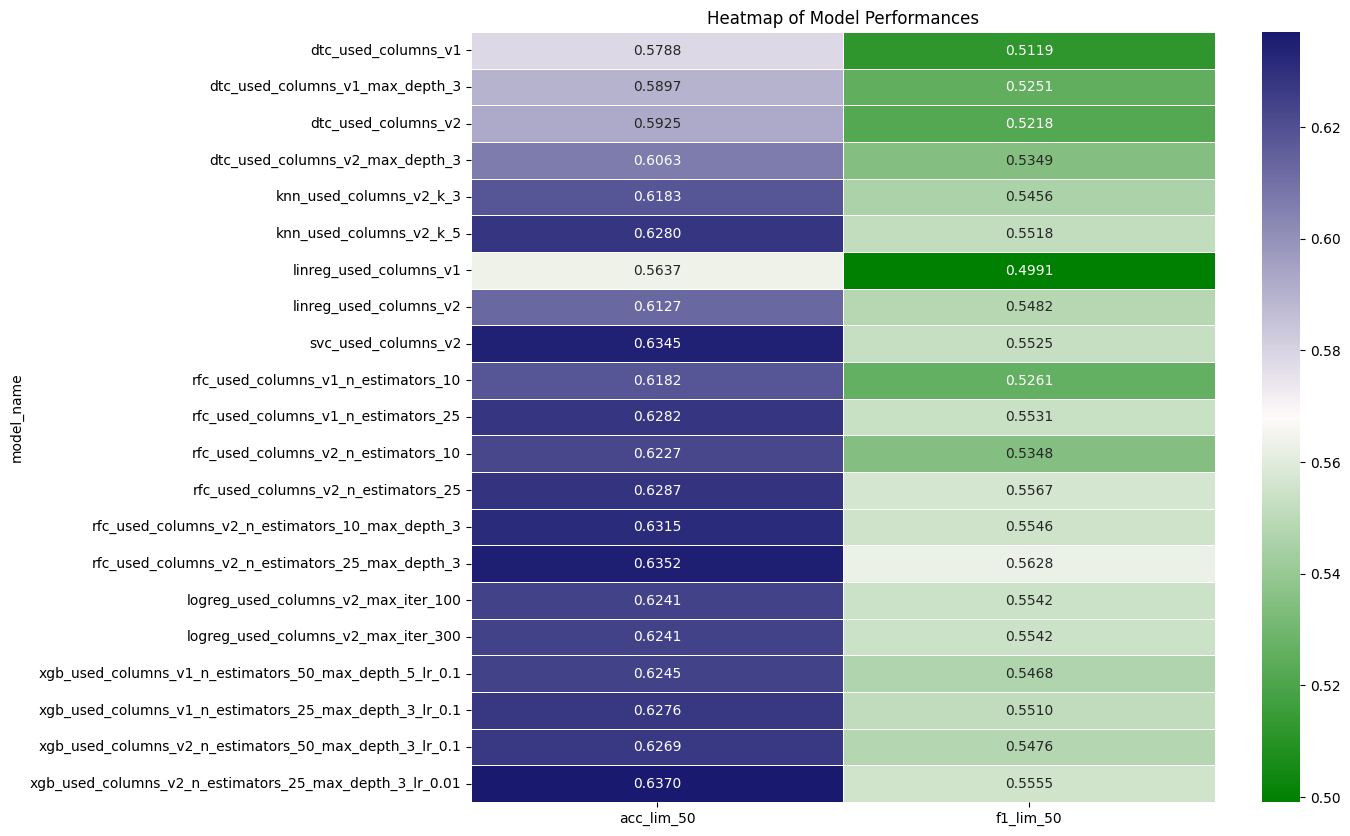

In [7]:
#cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#f7fbff', '#2c7fb8'])
cmap = LinearSegmentedColormap.from_list('custom_cmap', ["green", "snow", "midnightblue"])
#cmap = "RdYlBu"

plt.figure(figsize=(12, 10))
sns.heatmap(df_cb[["acc_lim_50", "f1_lim_50"]], annot=True, cmap=cmap, linewidths=0.5, fmt=".4f") # "coolwarm"
plt.title("Heatmap of Model Performances")
plt.show()

In [8]:
best_cb = ("content_based_recommendation", "xgb_used_columns_v2_n_estimators_25_max_depth_3_lr_0.01")

### Item Response Theory - WORC

In [9]:
df_irt_worc.sort_values("acc_lim_50", ascending=False)

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
worc_ability_mean_difficulty_expert,0.6936,0.6545,0.6110,0.7903
worc_ability_mean_ab_int_3_difficulty_expert_diff_int_3,0.6936,0.6545,0.6109,0.7904
worc_ability_mean_difficulty_expert_diff_int_3,0.6775,0.6857,0.6355,0.8316
worc_ability_mean_ab_int_3_difficulty_expert,0.6584,0.5302,0.4751,0.6694


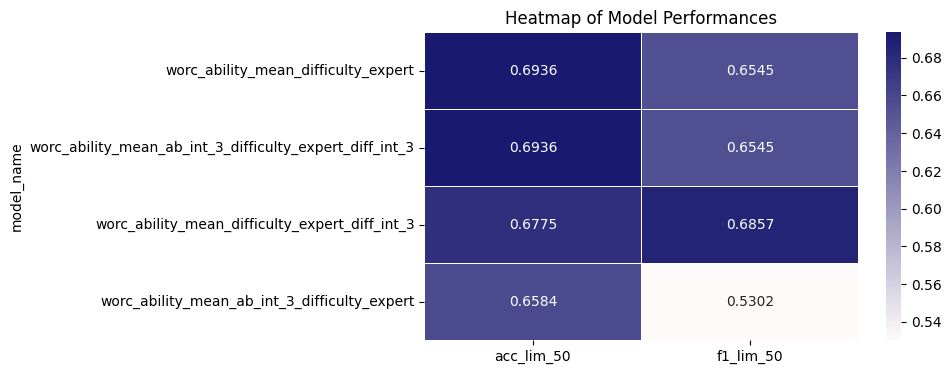

In [10]:
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ["snow", "midnightblue"])

plt.figure(figsize=(7,4))
sns.heatmap(df_irt_worc[["acc_lim_50", "f1_lim_50"]], annot=True, cmap=custom_cmap, linewidths=0.5, fmt=".4f")
plt.title("Heatmap of Model Performances")
plt.show()

In [11]:
best_irt_worc = ("item_response_theory", "worc_ability_mean_difficulty_expert")

### Knowledge Tracing - WORC

In [12]:
df_kt_worc.sort_values("acc_lim_50", ascending=False)

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
lfa_worc_,0.6241,0.5295,0.4663,0.6862
pfa_worc_beta_skill,0.6143,0.5070,0.4535,0.6497
bkt_forget_worc_knowl_param_method_expert_perf_param_method_expert_prob,0.6123,0.5639,0.5342,0.7135
bkt_worc_knowl_param_method_expert_perf_param_method_expert_prob,0.6083,0.5968,0.5392,0.7794
bkt_forget_worc_knowl_param_method_constant_perf_param_method_constant_p_init_0.6_p_learn_0.2_p_forget_0.1_p_slip_0.3_p_guess_0.25,0.6025,0.5408,0.4752,0.7146
bkt_forget_worc_knowl_param_method_constant_perf_param_method_constant_p_init_0.4_p_learn_0.2_p_forget_0.1_p_slip_0.1_p_guess_0.25,0.6018,0.5294,0.4675,0.6961
bkt_worc_knowl_param_method_constant_perf_param_method_constant_p_init_0.3_p_learn_0.1_p_slip_0.1_p_guess_0.25,0.6002,0.4957,0.4469,0.6378
bkt_worc_knowl_param_method_expert_perf_param_method_expert_skill,0.5963,0.5522,0.4866,0.7316
bkt_forget_worc_knowl_param_method_expert_perf_param_method_expert_skill,0.5933,0.5092,0.4548,0.6655


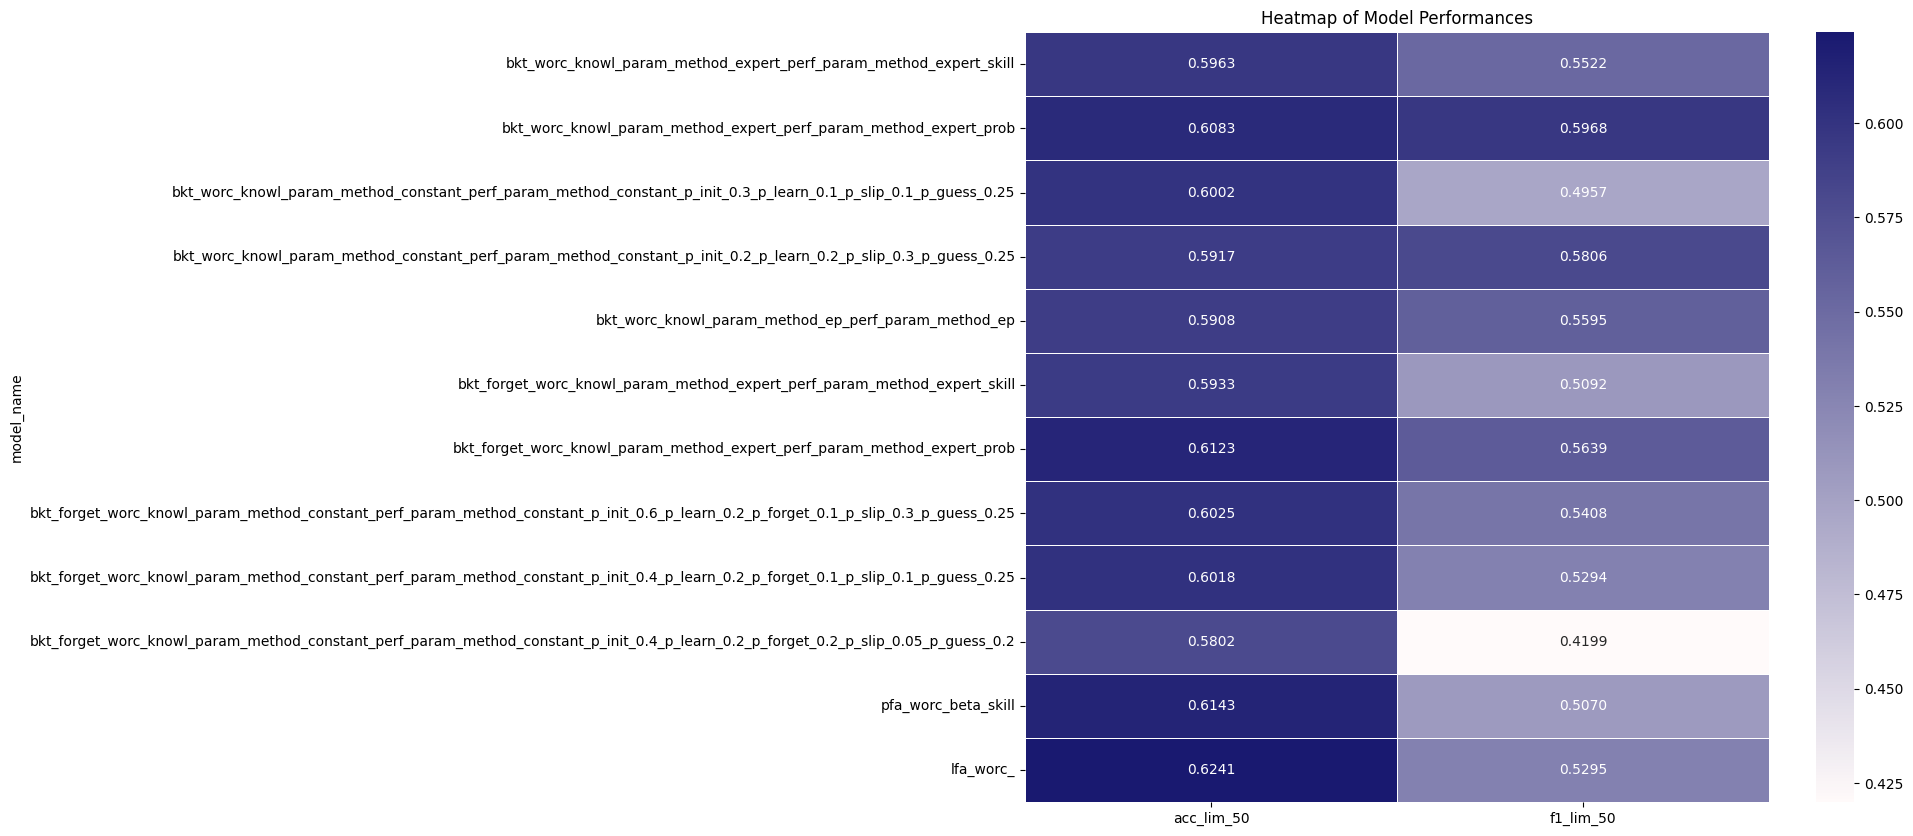

In [13]:
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ["snow", "midnightblue"])

plt.figure(figsize=(12, 10))
sns.heatmap(df_kt_worc.loc[df_kt_worc["f1_lim_50"] > 0, ["acc_lim_50", "f1_lim_50"]], annot=True, cmap=custom_cmap, linewidths=0.5, fmt=".4f")
plt.title("Heatmap of Model Performances")
plt.show()

In [14]:
best_lkt_worc = ("knowledge_tracing", "lfa_worc_")
best_bkt_worc = ("knowledge_tracing", "bkt_forget_worc_knowl_param_method_expert_perf_param_method_expert_prob")

### Comparison WORC

In [15]:
summary_df = results_total_worc.loc[
    [("baseline", "baseline"), best_cb, best_irt_worc, best_bkt_worc, best_lkt_worc]
].reset_index()
summary_df.loc[summary_df["model_name"] == best_cb[1], "method"] = "CBR"
summary_df.loc[summary_df["model_name"] == best_irt_worc[1], "method"] = "IRT"
summary_df.loc[summary_df["model_name"] == best_lkt_worc[1], "method"] = "LKT"
summary_df.loc[summary_df["model_name"] == best_bkt_worc[1], "method"] = "BKT"
summary_df.loc[summary_df["model_name"] == "baseline", "method"] = "Baseline"
summary_df = summary_df.set_index("method").drop(columns="model_name")
summary_df

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
method,,,,
Baseline,0.6342,0.5441,0.4651,0.7212
CBR,0.6370,0.5555,0.4853,0.7225
IRT,0.6936,0.6545,0.6110,0.7903
BKT,0.6123,0.5639,0.5342,0.7135
LKT,0.6241,0.5295,0.4663,0.6862


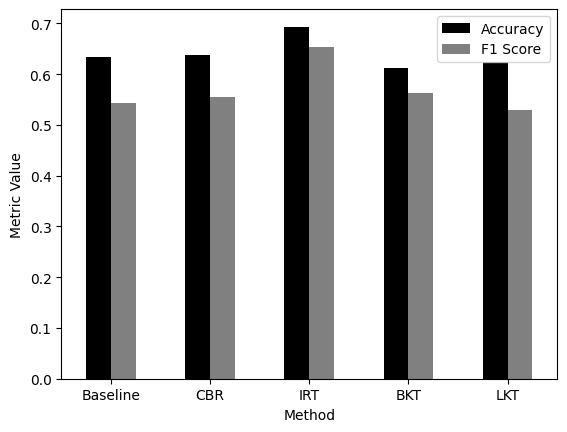

In [16]:
#colors = ["skyblue", "lightblue"]
colors = ["black", "grey"]
summary_df.rename(
    columns={
        "acc_lim_50": "Accuracy",
        "f1_lim_50": "F1 Score",
        "precision_lim_50": "Precision",
        "recall_lim_50": "Recall",
    }
)[["Accuracy", "F1 Score"]].plot(kind="bar", color=colors)
#plt.title("F1 Score and Accuracy of best Model per Method WORC")
plt.xlabel("Method")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.show()

## WRC

In [17]:
# ref classes restricted
idx_random = utils.read_data_file("ref_classes_restricted_random.csv")
idx_random

,class_id,ut_id,ref_class
0,100VH25818,1JP23ZDV6R,2CC531MM66
1,100VH25818,1MOJEXDKSA,VI5OCBZU0
2,101DWZ8JPV,2NCU4SKWK,29PJ8EBQDP
3,101DWZ8JPV,42ZJIQBIE,1E1IWF6N67
4,101DWZ8JPV,G3SWY48TK,20UUYT6YTD
...,...,...,...
2334,ZXK4INTOW,1JIAKUDFWB,1V8LEIHJ91
2335,ZXK4INTOW,1N3LZJ9L23,1IBQ1UDTWG
2336,ZXK4INTOW,1SAWTQDD78,119ESZK0V7
2337,ZXK4INTOW,2I3W30HSW8,MI84BBCIA


In [18]:
MODELS_WRC = {
    "collaborative_filtering": CF_MODELS,
    "item_response_theory": IRT_MODELS_WRC,
    "knowledge_tracing": KT_MODELS_WRC
}
results_total_wrc = evaluation.get_total_results(MODELS_WRC, idx_random, METRICS, wrc=True, print_info=False)
results_total_wrc

acc_lim_50  \
method                  model_name                                                       
collaborative_filtering knn_sim_manhattan_pred_resnick_k_3                      0.6516   
                        knn_sim_manhattan_pred_resnick_k_5                      0.6638   
                        knn_sim_manhattan_pred_weightavg_k_3                    0.6346   
                        knn_sim_manhattan_pred_weightavg_k_5                    0.6359   
                        knn_sim_manhattan_weight_significance_T_10_pred...      0.6552   
                        knn_sim_manhattan_weight_significance_T_20_pred...      0.6559   
                        knn_sim_manhattan_weight_significance_T_10_pred...      0.6655   
                        knn_sim_manhattan_weight_significance_T_20_pred...      0.6665   
                        knn_sim_manhattan_weight_significance_T_10_pred...      0.6344   
                        knn_sim_manhattan_weight_significance_T_20_pred...      0.6346   
                        knn_sim_manhattan_weight_significance_T_10_pred...      0.6360   
                        knn_sim_manhattan_weight_significance_T_20_pred...      0.6355   
                        knn_item_sim_manhattan_pred_weightavg_k_5               0.6451   
                        knn_item_sim_manhattan_pred_resnick_k_5                 0.6559   
                        knn_item_sim_manhattan_weight_significance_T_10...      0.6447   
                        knn_item_sim_manhattan_weight_significance_T_10...      0.6602   
item_response_theory    wrc_ability_mean_difficulty_mean                        0.6689   
                        wrc_ability_mean_ab_int_3_difficulty_mean_diff_...      0.6689   
                        wrc_ability_mean_ab_int_3_difficulty_mean               0.6570   
                        wrc_ability_mean_difficulty_mean_diff_int_3             0.6383   
                        wrc_ability_mean_difficulty_pc                          0.6471   
                        wrc_ability_mean_ab_int_3_difficulty_pc                 0.6814   
                        wrc_ability_elo_difficulty_elo_W_0.2                    0.6294   
                        wrc_ability_elo_difficulty_elo_W_0.4                    0.6194   
                        wrc_ability_elo_difficulty_elo_W_0.6                    0.6137   
                        wrc_ability_package_difficulty_1pl                      0.6648   
                        wrc_ability_package_difficulty_2pl                      0.6105   
knowledge_tracing       bkt_wrc_knowl_param_method_ep_rc_perf_param_met...      0.5885   
                        bkt_wrc_knowl_param_method_rc_perf_param_method_rc      0.5786   
                        bkt_wrc_knowl_param_method_rc_perf_param_method...      0.5789   
                        bkt_wrc_knowl_param_method_rc_perf_param_method...      0.5945   
                        bkt_forget_wrc_knowl_param_method_rc_perf_param...      0.5836   
                        bkt_forget_wrc_knowl_param_method_rc_perf_param...      0.5855   
                        bkt_forget_wrc_knowl_param_method_rc_perf_param...      0.6126   
                        pfa_wrc_beta_item                                       0.6686   
                        pfa_wrc_beta_skill                                      0.6326   
                        lfa_wrc_                                                0.6385   
baseline                baseline                                                0.6342   

                                                                            f1_lim_50  \
method                  model_name                                                      
collaborative_filtering knn_sim_manhattan_pred_resnick_k_3                     0.5685   
                        knn_sim_manhattan_pred_resnick_k_5                     0.5778   
                        knn_sim_manhattan_pred_weightavg_k_3                   0.5725   
                        knn_si

In [19]:
df_cf = results_total_wrc.loc["collaborative_filtering"]
df_irt_wrc = results_total_wrc.loc["item_response_theory"]
df_kt_wrc = results_total_wrc.loc["knowledge_tracing"]
df_baseline = results_total_wrc.loc["baseline"]

### Baseline

In [20]:
df_baseline

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
baseline,0.6342,0.5441,0.4651,0.7212


### Collaborative Filtering

In [21]:
df_cf.sort_values("acc_lim_50", ascending=False)

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
knn_sim_manhattan_weight_significance_T_20_pred_resnick_k_5,0.6665,0.5819,0.6138,0.6309
knn_sim_manhattan_weight_significance_T_10_pred_resnick_k_5,0.6655,0.5802,0.6134,0.6286
knn_sim_manhattan_pred_resnick_k_5,0.6638,0.5778,0.6136,0.6255
knn_item_sim_manhattan_weight_significance_T_10_pred_resnick_k_5,0.6602,0.5565,0.5687,0.6242
knn_sim_manhattan_weight_significance_T_20_pred_resnick_k_3,0.6559,0.5752,0.6119,0.6223
knn_item_sim_manhattan_pred_resnick_k_5,0.6559,0.5559,0.5669,0.6244
knn_sim_manhattan_weight_significance_T_10_pred_resnick_k_3,0.6552,0.5739,0.6120,0.6202
knn_sim_manhattan_pred_resnick_k_3,0.6516,0.5685,0.6088,0.6149
knn_item_sim_manhattan_pred_weightavg_k_5,0.6451,0.5658,0.5374,0.6793


In [22]:
# influence of prediction method on user-based models
# differences between comparable models with pred=resnick and pred=weightavg
total_diff = (0.6665 - 0.6355) + (0.6655 - 0.6360) + (0.6638 - 0.6359) + (0.6559 - 0.6346) + (0.6552 - 0.6344) + (0.6516 - 0.6346)
total_diff, total_diff / 6

(0.14749999999999985, 0.024583333333333308)

In [23]:
best_cf = ("collaborative_filtering", "knn_sim_manhattan_weight_significance_T_20_pred_resnick_k_5")

### Item Response Theory - WRC

In [24]:
df_irt_wrc.sort_values("acc_lim_50", ascending=False)

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
wrc_ability_mean_ab_int_3_difficulty_pc,0.6814,0.5780,0.6047,0.6341
wrc_ability_mean_difficulty_mean,0.6689,0.6132,0.6008,0.7176
wrc_ability_mean_ab_int_3_difficulty_mean_diff_int_3,0.6689,0.6132,0.6008,0.7176
wrc_ability_package_difficulty_1pl,0.6648,0.6058,0.6303,0.6704
wrc_ability_mean_ab_int_3_difficulty_mean,0.6570,0.5218,0.4701,0.6539
wrc_ability_mean_difficulty_pc,0.6471,0.5886,0.6295,0.6477
wrc_ability_mean_difficulty_mean_diff_int_3,0.6383,0.6195,0.6205,0.7271
wrc_ability_elo_difficulty_elo_W_0.2,0.6294,0.6434,0.5748,0.8361
wrc_ability_elo_difficulty_elo_W_0.4,0.6194,0.6497,0.5751,0.8544


In [25]:
best_irt_wrc = ("item_response_theory", "wrc_ability_mean_ab_int_3_difficulty_pc")

### Knowledge Tracing - WRC

In [26]:
df_kt_wrc.sort_values("acc_lim_50", ascending=False)

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
model_name,,,,
pfa_wrc_beta_item,0.6686,0.5848,0.5692,0.6888
lfa_wrc_,0.6385,0.5134,0.4548,0.6551
pfa_wrc_beta_skill,0.6326,0.5035,0.4507,0.6389
bkt_forget_wrc_knowl_param_method_rc_perf_param_method_expert_prob,0.6126,0.5615,0.5442,0.6941
bkt_wrc_knowl_param_method_rc_perf_param_method_expert_prob,0.5945,0.6131,0.5462,0.8106
bkt_wrc_knowl_param_method_ep_rc_perf_param_method_ep_rc,0.5885,0.5682,0.5016,0.7543
bkt_forget_wrc_knowl_param_method_rc_perf_param_method_expert_skill,0.5855,0.4988,0.4479,0.6489
bkt_forget_wrc_knowl_param_method_rc_perf_param_method_rc,0.5836,0.5005,0.4490,0.6526
bkt_wrc_knowl_param_method_rc_perf_param_method_expert_skill,0.5789,0.5873,0.5140,0.7900


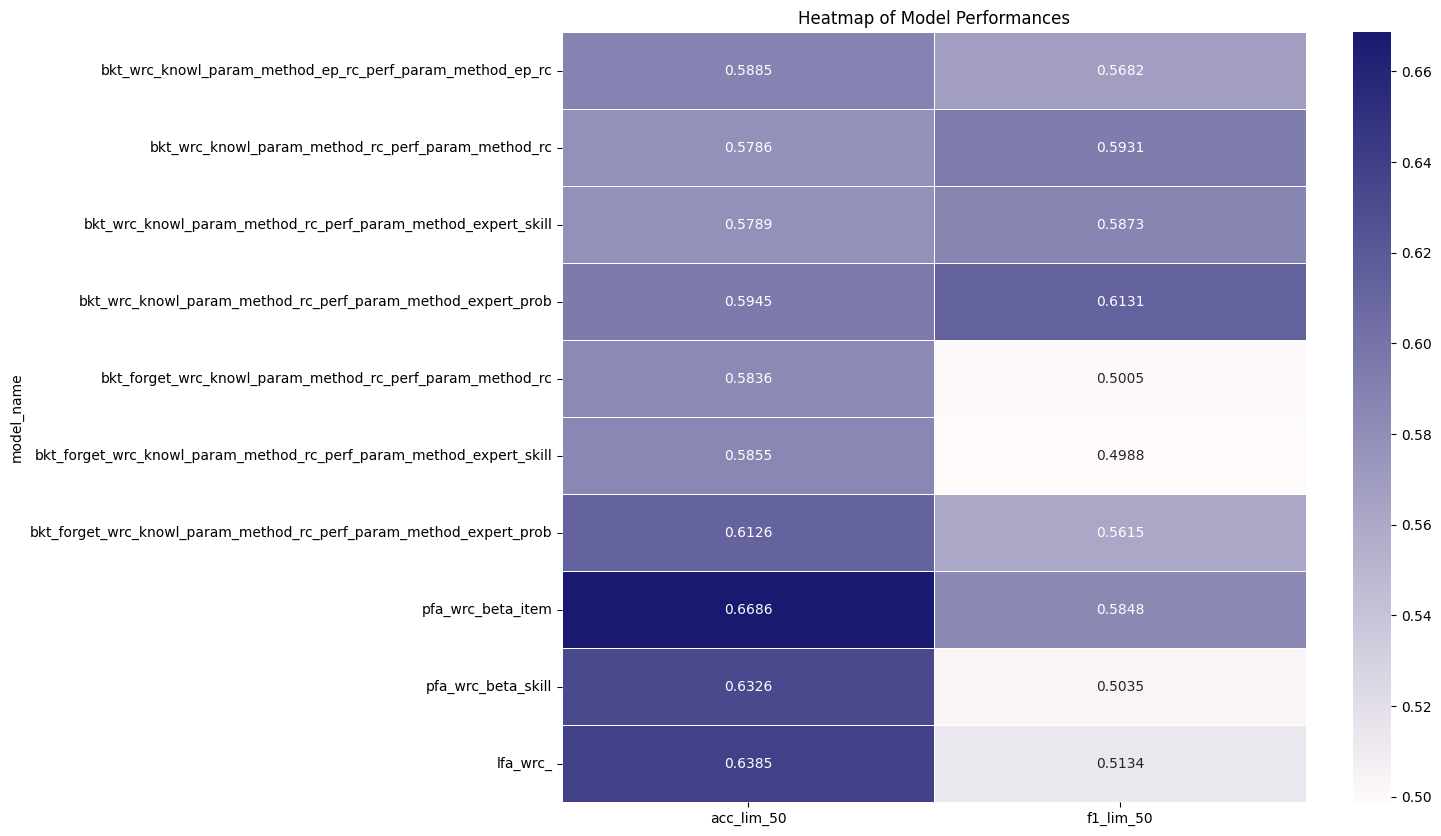

In [27]:
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ["snow", "midnightblue"])

plt.figure(figsize=(12, 10))
sns.heatmap(df_kt_wrc[["acc_lim_50", "f1_lim_50"]], annot=True, cmap=custom_cmap, linewidths=0.5, fmt=".4f")
plt.title("Heatmap of Model Performances")
plt.show()

In [28]:
best_lkt_wrc = ("knowledge_tracing", "pfa_wrc_beta_item")
best_bkt_wrc = ("knowledge_tracing", "bkt_forget_wrc_knowl_param_method_rc_perf_param_method_expert_prob")

### Comparison WRC

In [29]:
summary_df = results_total_wrc.loc[
    [("baseline", "baseline"), best_cf, best_irt_wrc, best_bkt_wrc, best_lkt_wrc]
].reset_index()
summary_df.loc[summary_df["model_name"] == best_cf[1], "method"] = "CF"
summary_df.loc[summary_df["model_name"] == best_irt_wrc[1], "method"] = "IRT"
summary_df.loc[summary_df["model_name"] == best_lkt_wrc[1], "method"] = "LKT"
summary_df.loc[summary_df["model_name"] == best_bkt_wrc[1], "method"] = "BKT"
summary_df.loc[summary_df["model_name"] == "baseline", "method"] = "Baseline"
summary_df = summary_df.set_index("method").drop(columns="model_name")
summary_df

,acc_lim_50,f1_lim_50,precision_lim_50,recall_lim_50
method,,,,
Baseline,0.6342,0.5441,0.4651,0.7212
CF,0.6665,0.5819,0.6138,0.6309
IRT,0.6814,0.5780,0.6047,0.6341
BKT,0.6126,0.5615,0.5442,0.6941
LKT,0.6686,0.5848,0.5692,0.6888


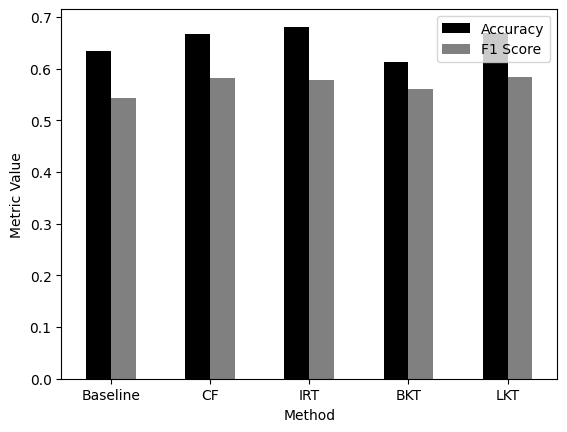

In [30]:
#colors = ["skyblue", "lightblue"]
colors = ["black", "grey"]
summary_df.rename(
    columns={
        "acc_lim_50": "Accuracy",
        "f1_lim_50": "F1 Score",
        "precision_lim_50": "Precision",
        "recall_lim_50": "Recall",
    }
)[["Accuracy", "F1 Score"]].plot(kind="bar", color=colors)
#plt.title("F1 Score and Accuracy of best Model per Method WRC")
plt.xlabel("Method")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.show()

## The Effect of 0-Assignments

For assignments only containing 0, the f1 score is 0 per default, regardless of the predictions.
We have a look at how heavy this influences the predictions by comparing the mean with all instances with the mean without the 0-assignments.

c:\Users\Chiara\Documents\Uni_Master_MMDS\Masterarbeit\elearning-recommender\sources\utils.py:15: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(config.DATA_FOLDER / filename)


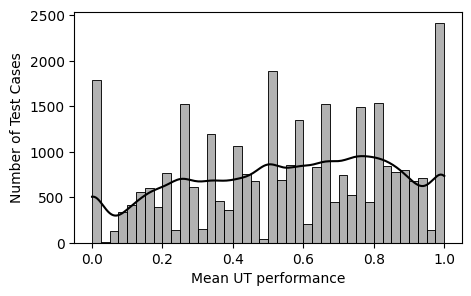

In [31]:
df = utils.read_data_file("final_data_main_approach.csv")
ut = df.loc[df["unit_test"] == 1].copy()
mean_perf = ut.groupby(["class_id", "sequence_id", "student_id"])["first_answer"].mean()


plt.figure(figsize=(5,3))
sns.histplot(data=mean_perf, bins=40, kde=True, color="black", alpha=0.3)
#plt.title(f"Distribution of Mean UT Performance")
plt.xlabel("Mean UT performance")
plt.ylabel("Number of Test Cases")
plt.show()

In [32]:
BEST_MODELS_WORC = [("baseline", "baseline"), best_cb, best_irt_worc, best_bkt_worc, best_lkt_worc]
mean_df_worc = evaluation.get_mean_df(BEST_MODELS_WORC)

mean_df_worc = mean_df_worc.reset_index()
mean_df_worc.loc[mean_df_worc["model_name"] == best_cb[1], "method"] = "CBR"
mean_df_worc.loc[mean_df_worc["model_name"] == best_irt_worc[1], "method"] = "IRT"
mean_df_worc.loc[mean_df_worc["model_name"] == best_lkt_worc[1], "method"] = "LKT"
mean_df_worc.loc[mean_df_worc["model_name"] == best_bkt_worc[1], "method"] = "BKT"
mean_df_worc.loc[mean_df_worc["model_name"] == "baseline", "method"] = "Baseline"
mean_df_worc = mean_df_worc.set_index("method").drop(columns="model_name")
mean_df_worc

Read file baseline_20240826_001703.csv
Read file xgb_used_columns_v2_n_estimators_25_max_depth_3_lr_0.01_20240805_123528.csv
Read file worc_ability_mean_difficulty_expert_20240716_180239.csv
Read file bkt_forget_worc_knowl_param_method_expert_perf_param_method_expert_prob_20240816_185933.csv
Read file lfa_worc__20240802_150844.csv


,Accuracy_all,F1_all,Accuracy_corr,F1_corr
method,,,,
Baseline,0.6342,0.5441,0.6351,0.5774
CBR,0.637,0.5555,0.6379,0.5896
IRT,0.6936,0.6545,0.6984,0.6946
BKT,0.6123,0.5639,0.6168,0.5985
LKT,0.6241,0.5295,0.6249,0.562


Leaving out the 0-assignments increases the mean f1 scores by around 3-4% points, depending on the method.